In [77]:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import pandas as pd
import numpy as np

In [16]:
df_track = pd.read_csv("track.csv", sep = '\t')
df_track.head()

,Track_name,Track_link,User_name,User_link,Play_count,Duration
0,Zara Larsson - Uncover (Millesim Remix),https://soundcloud.com/millesimofficial/zara-l...,Millesim,https://soundcloud.com/millesimofficial,None,3:54
1,The Chainsmokers Ft. GGFO - Let You Go (Aash M...,https://soundcloud.com/aash-mehta/let-you-go?i...,Aash Mehta,https://soundcloud.com/aash-mehta,8.78M,5:12
2,Birds Fly (Commentary Bonus Version) [feat. Mr...,https://soundcloud.com/hardwell/hardwell-feat-...,HARDWELL,https://soundcloud.com/hardwell,6.6M,None
3,KDrew - Tonight (GRMM Remix),https://soundcloud.com/hegemon/kdrew-tonight-g...,Hegemon Select,https://soundcloud.com/hegemon,6.94M,4:03
4,The Light (Acoustic Version),https://soundcloud.com/armadamusic/disco-fries...,Armada Music,https://soundcloud.com/armadamusic,5.5M,3:20


- Số dòng, số cột:

In [17]:
df_track.shape

(10725, 6)

- Thông tin dữ liệu:

In [18]:
df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10725 entries, 0 to 10724
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Track_name  10725 non-null  object
 1   Track_link  10725 non-null  object
 2   User_name   10725 non-null  object
 3   User_link   10725 non-null  object
 4   Play_count  10672 non-null  object
 5   Duration    10725 non-null  object
dtypes: object(6)
memory usage: 502.9+ KB


(Dữ liêu "Play count" bị thiếu vì trong lúc khai thác dữ liệu quy định nếu không xuất hiện thông tin thì trả về None)

- Chuyển định dạng số ở cột Play count:

In [64]:
df = df_track.copy()

- Xóa đi những dòng bị thiếu dữ liệu:

In [65]:
df.dropna(axis=0, inplace=True)
df = df.mask(df.eq('None')).dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9863 entries, 1 to 10724
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Track_name  9863 non-null   object
 1   Track_link  9863 non-null   object
 2   User_name   9863 non-null   object
 3   User_link   9863 non-null   object
 4   Play_count  9863 non-null   object
 5   Duration    9863 non-null   object
dtypes: object(6)
memory usage: 539.4+ KB


- Chuyển định dạng thuộc tính số lượt nghe(Play count) sang dạng int:

In [66]:
df["Play_count"] = df["Play_count"].apply(lambda x: x.replace(',', ''))

df["Play_count"] = df["Play_count"].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)

In [67]:
df

,Track_name,Track_link,User_name,User_link,Play_count,Duration
1,The Chainsmokers Ft. GGFO - Let You Go (Aash M...,https://soundcloud.com/aash-mehta/let-you-go?i...,Aash Mehta,https://soundcloud.com/aash-mehta,8780000,5:12
3,KDrew - Tonight (GRMM Remix),https://soundcloud.com/hegemon/kdrew-tonight-g...,Hegemon Select,https://soundcloud.com/hegemon,6940000,4:03
4,The Light (Acoustic Version),https://soundcloud.com/armadamusic/disco-fries...,Armada Music,https://soundcloud.com/armadamusic,5500000,3:20
5,Halsey - Ghost (Lost Kings Remix),https://soundcloud.com/wearelostkings/ghost-lo...,Lost Kings,https://soundcloud.com/wearelostkings,9870000,3:07
6,ODESZA - All We Need (feat. Shy Girls) (Autogr...,https://soundcloud.com/mrsuicidesheep/odesza-a...,MrSuicideSheep,https://soundcloud.com/mrsuicidesheep,8350000,6:11
...,...,...,...,...,...,...
10720,Dropout - Handcrafted,https://soundcloud.com/dropoutlive/dropout-han...,dropout,https://soundcloud.com/dropoutlive,652000,3:08
10721,Better Days (feat. Bogie),https://soundcloud.com/yourfriendbongi/better-...,Bongi,https://soundcloud.com/yourfriendbongi,112000,3:53
10722,Gaullin - Moonlight,https://soundcloud.com/gaullinmusic/gaullin-mo...,Gaullin,https://soundcloud.com/gaullinmusic,4420000,2:53
10723,Taska Black - Losing Our Minds ft. Nevve,https://soundcloud.com/bitbird/taskablack-losi...,bitbird,https://soundcloud.com/bitbird,463000,3:28


In [70]:
df['Track_link'] = df['Track_link'].replace(' ', '').astype(str)
df['Track_link'] = df['Track_link'].replace('\n', '').astype(str)
test = df.drop_duplicates(subset=['Track_link'], keep='first')
# test = test.sort_values(['Play_link'], ascending=0)
# test

In [95]:
df_1 = test.sort_values('Play_count', ascending = True).head(15)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

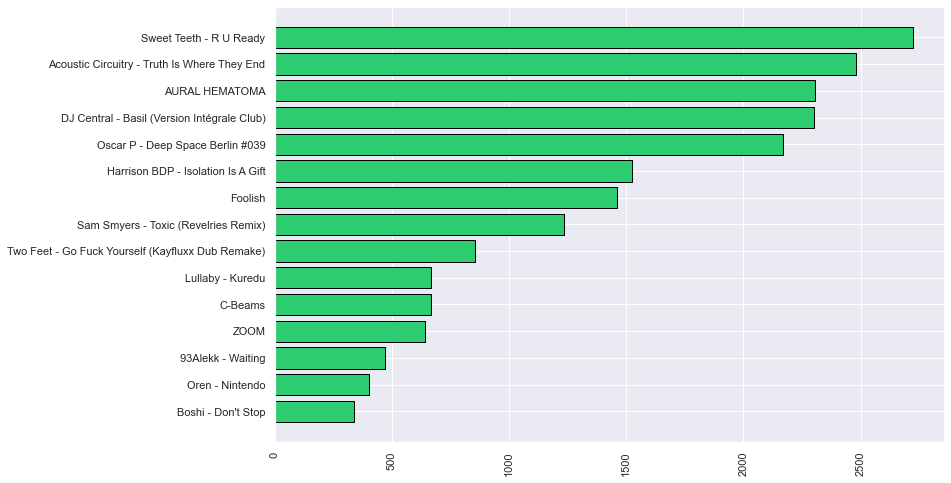

In [96]:
sns.set(rc={'figure.figsize':(12,8)})
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(df_1.Track_name, df_1.Play_count, fill='black', color="#2ecc71", edgecolor=['black'])
plt.xticks(rotation=90)

In [91]:
df_1 = df_1.sort_values('Play_count', ascending = False)

In [92]:
df_1

,Track_name,Track_link,User_name,User_link,Play_count,Duration
14,Halsey - Ghost (Lost Kings Remix),https://soundcloud.com/wearelostkings/ghost-lo...,Lost Kings,https://soundcloud.com/wearelostkings,9870000,3:07
13,The Chainsmokers Ft. GGFO - Let You Go (Aash M...,https://soundcloud.com/aash-mehta/let-you-go?i...,Aash Mehta,https://soundcloud.com/aash-mehta,8780000,5:12
12,ODESZA - All We Need (feat. Shy Girls) (Autogr...,https://soundcloud.com/mrsuicidesheep/odesza-a...,MrSuicideSheep,https://soundcloud.com/mrsuicidesheep,8350000,6:11
11,KDrew - Tonight (GRMM Remix),https://soundcloud.com/hegemon/kdrew-tonight-g...,Hegemon Select,https://soundcloud.com/hegemon,6940000,4:03
10,The Light (Acoustic Version),https://soundcloud.com/armadamusic/disco-fries...,Armada Music,https://soundcloud.com/armadamusic,5500000,3:20
9,Panda Eyes - KIKO,https://soundcloud.com/officialpandaeyes/panda...,Panda Eyes,https://soundcloud.com/officialpandaeyes,4250000,5:13
8,Mixtape N°4 - Kungs (TRACKLIST OUT),https://soundcloud.com/le-comptoir-auditif/mix...,Le Comptoir Auditif,https://soundcloud.com/le-comptoir-auditif,3090000,56:14
7,Ed Sheeran - Thinking Out Loud (Xander Remix),https://soundcloud.com/mrsuicidesheep/ed-sheer...,MrSuicideSheep,https://soundcloud.com/mrsuicidesheep,2960000,4:47
6,Calvin Harris - I Need Your Love Ft Ellie Goul...,https://soundcloud.com/aflo35/calvin-harris-i-...,Aflo.,https://soundcloud.com/aflo35,2920000,5:20
5,Little Dragon - Twice (Tora Cover),https://soundcloud.com/toramusic/twice?in=elia...,Tora,https://soundcloud.com/toramusic,1990000,3:03
